# Readme
This is an educational project that uses CIFAR10 dataset from tensorflow. The datasets represents pictures of 10 types of obejects (https://www.cs.toronto.edu/~kriz/cifar.html). Convolutional neural nmetwork was utlizied to build a classification model.

# Prepare data

## Import modules

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Explore data

In [24]:
# create an array with name of classes
classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(classes)

10

In [25]:
y_train = y_train.reshape(-1,)

In [26]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Text(0.5, 1.0, 'frog')

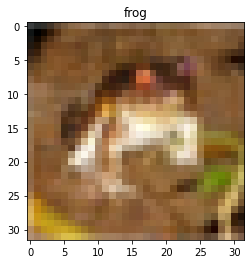

In [31]:
# visualize the first image
plt.imshow(X_train[0])
plt.title( classes[int(y_train[0])] )

In [32]:
# normalize X_train, X_test
X_train = X_train / 255
X_test = X_test / 255

# Create ANN
Performance is suboptimal for this ANN because accuracy is around 48%. This code is for illustraion purposes.

In [38]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.8129 - accuracy: 0.3526
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6216 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5381 - accuracy: 0.4598
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4769 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4295 - accuracy: 0.4975


In [39]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4745 - accuracy: 0.4728


[1.474548101425171, 0.47279998660087585]

# Create CNN
CNN performs significantly better and faster that the previous ANN. Accuracy is around 70% on the test set.

In [42]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D( filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3) ),
    layers.MaxPooling2D((2,2)),
    
    #cnn
    layers.Conv2D( filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(), #no need to specify
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4465 - accuracy: 0.4795
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1094 - accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9828 - accuracy: 0.6570
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8986 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8390 - accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7792 - accuracy: 0.7291
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7286 - accuracy: 0.7468
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6784 - accuracy: 0.7644
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6316 - accuracy: 0.7799
Epoch 10/10
1563/1563 [==============================] - 15s 10m

In [43]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9145 - accuracy: 0.6978


[0.9145439267158508, 0.6977999806404114]

# Visualize results

## Create y_pred 

In [110]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [111]:
# explore y_pred output
y_pred[0]

array([2.69760476e-05, 1.74882734e-04, 7.66716606e-04, 9.75036800e-01,
       9.24450142e-05, 1.47048095e-02, 4.21046373e-03, 3.14449717e-05,
       4.93430952e-03, 2.10720937e-05], dtype=float32)

In [112]:
# find the max and its place in array
np.argmax(y_pred[0])

3

In [113]:
len(y_pred)

10000

In [114]:
y_pred_ = [0]*len(y_pred)

for i in range(len(y_pred)):
    y_pred_[i] = np.argmax(y_pred[i])

In [115]:
y_pred = y_pred_

## Classification report

In [116]:
from sklearn.metrics import classification_report
# classification report
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.81      0.67      0.74      1000
  automobile       0.74      0.88      0.80      1000
        bird       0.63      0.55      0.59      1000
         cat       0.57      0.44      0.49      1000
        deer       0.68      0.61      0.64      1000
         dog       0.55      0.70      0.62      1000
        frog       0.75      0.79      0.77      1000
       horse       0.69      0.79      0.73      1000
        ship       0.80      0.77      0.78      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



## Confusion Matrix

<AxesSubplot:>

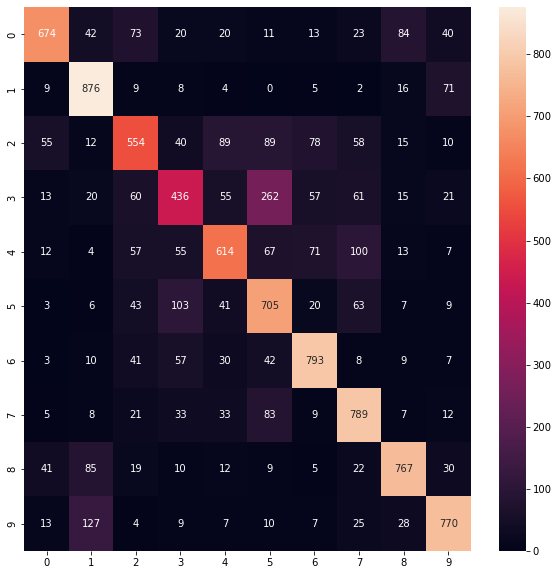

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')